In [335]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

In [365]:
# Loading the dataset
train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

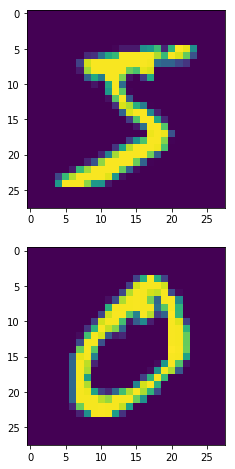

In [366]:
# Plotting some of the images
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].imshow(train_images[0])
ax[1].imshow(train_images[1])
plt.show()

In [367]:
# Converting images to 784 dimension vector and normalizing them
train_images = train_images.reshape(train_images.shape[0], -1) / 255
test_images = test_images.reshape(test_images.shape[0], -1) / 255

In [368]:
X = train_images
y = train_labels

In [369]:
# Defining the architecture of neural Network
n_x = train_images.shape[1]
n_h = 256
n_y = 10

In [370]:
# Initializing the pararmeters
W1 = 0.01 * np.random.randn(n_x, n_h)
b1 = np.ones((1, n_h)) * 0.01
W2 = 0.01 * np.random.randn(n_h, n_y)
b2 = np.ones((1, n_y)) * 0.01

In [371]:
# ReLU Activation function
def ReLU(x):
    return np.maximum(x, 0)

In [372]:
# Forward propagation
Z1 = X.dot(W1) + b1
A1 = ReLU(Z1)
Z2 = A1.dot(W2) + b2
yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)

In [373]:
m = X.shape[0]

In [374]:
# Cross Entropy Loss
loss = np.mean(-np.log(yhat[range(m), y]))

In [375]:
loss

2.3027150251751713

In [376]:
# Backpropagation
dZ2 = yhat
dZ2[range(m),y] -= 1
dZ2 = dZ2 / m
dW2 = A1.T.dot(dZ2)
db2 = np.sum(dZ2, axis=0, keepdims=True)
dZ1 = dZ2.dot(W2.T)
dZ1[dZ1 <= 0] = 0
dW1 = X.T.dot(dZ1)
db1 = np.sum(dZ1, axis=0, keepdims=True)

# Using DropOut Regularization

In [348]:
# Update the paramteres
batch_size = 64
n_epochs = 250
learning_rate = 1e-2
train_loss = []
test_loss = []
test_acc = []
train_acc = []
keep_prob = 0.7
number_of_batches = m // batch_size
for epoch in range(n_epochs):
    loss = 0.0
    correct_cnt = 0
    for i in range(0, m - m % batch_size, batch_size):
        X = train_images[i: i + batch_size]
        y = train_labels[i: i + batch_size]
        # Forward propagation
        Z1 = X.dot(W1) + b1
        A1 = np.tanh(Z1)
        # DropOut
        dropout_mask = np.random.uniform(size=A1.shape)
        dropout_mask = dropout_mask <= keep_prob
        A1 = A1 * dropout_mask
        A1 /= keep_prob
        Z2 = A1.dot(W2) + b2
        yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
        # Cross Entropy Loss
        loss += np.mean(-np.log(yhat[range(X.shape[0]), y]))
        correct_cnt += np.sum(np.argmax(yhat, axis=1) == y)
        # Backpropagation
        dZ2 = yhat
        dZ2[range(i % batch_size, (i % batch_size + batch_size)), y] -= 1
        dZ2 = dZ2 / batch_size
        dW2 = A1.T.dot(dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = dZ2.dot(W2.T) * (1 - A1 ** 2)
        dZ1 = dZ1 * dropout_mask
        #dZ1[dZ1 <= 0] = 0
        dW1 = X.T.dot(dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        # Update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    loss_train = loss / number_of_batches
    train_accuracy = correct_cnt / m
    train_acc.append(train_accuracy)
    train_loss.append(loss_train)
    X = test_images
    Z1 = X.dot(W1) + b1
    A1 = np.tanh(Z1)
    Z2 = A1.dot(W2) + b2
    yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
    # Cross Entropy Loss
    loss_test = np.mean(-np.log(yhat[range(X.shape[0]), test_labels]))
    test_loss.append(loss_test)
    test_correct_cnt = np.sum(np.argmax(yhat, axis=1) == test_labels)
    test_accuracy = test_correct_cnt / len(test_labels)
    test_acc.append(test_accuracy)
    print(f'Epoch: {epoch} \t Training Acc: {train_accuracy:.4f} \t Test Acc: {test_accuracy:.4f}')

Epoch: 0 	 Training Acc: 0.6617 	 Test Acc: 0.7932
Epoch: 1 	 Training Acc: 0.8306 	 Test Acc: 0.8659
Epoch: 2 	 Training Acc: 0.8706 	 Test Acc: 0.8889
Epoch: 3 	 Training Acc: 0.8843 	 Test Acc: 0.8971
Epoch: 4 	 Training Acc: 0.8923 	 Test Acc: 0.9016
Epoch: 5 	 Training Acc: 0.8971 	 Test Acc: 0.9057
Epoch: 6 	 Training Acc: 0.9008 	 Test Acc: 0.9088
Epoch: 7 	 Training Acc: 0.9039 	 Test Acc: 0.9114
Epoch: 8 	 Training Acc: 0.9071 	 Test Acc: 0.9148
Epoch: 9 	 Training Acc: 0.9078 	 Test Acc: 0.9167
Epoch: 10 	 Training Acc: 0.9109 	 Test Acc: 0.9188
Epoch: 11 	 Training Acc: 0.9113 	 Test Acc: 0.9197
Epoch: 12 	 Training Acc: 0.9133 	 Test Acc: 0.9213
Epoch: 13 	 Training Acc: 0.9146 	 Test Acc: 0.9231
Epoch: 14 	 Training Acc: 0.9160 	 Test Acc: 0.9252
Epoch: 15 	 Training Acc: 0.9182 	 Test Acc: 0.9261
Epoch: 16 	 Training Acc: 0.9196 	 Test Acc: 0.9279
Epoch: 17 	 Training Acc: 0.9203 	 Test Acc: 0.9299
Epoch: 18 	 Training Acc: 0.9222 	 Test Acc: 0.9311
Epoch: 19 	 Training A

Epoch: 157 	 Training Acc: 0.9662 	 Test Acc: 0.9746
Epoch: 158 	 Training Acc: 0.9660 	 Test Acc: 0.9744
Epoch: 159 	 Training Acc: 0.9664 	 Test Acc: 0.9749
Epoch: 160 	 Training Acc: 0.9659 	 Test Acc: 0.9749
Epoch: 161 	 Training Acc: 0.9664 	 Test Acc: 0.9751
Epoch: 162 	 Training Acc: 0.9660 	 Test Acc: 0.9751
Epoch: 163 	 Training Acc: 0.9663 	 Test Acc: 0.9751
Epoch: 164 	 Training Acc: 0.9662 	 Test Acc: 0.9752
Epoch: 165 	 Training Acc: 0.9671 	 Test Acc: 0.9751
Epoch: 166 	 Training Acc: 0.9664 	 Test Acc: 0.9755
Epoch: 167 	 Training Acc: 0.9658 	 Test Acc: 0.9749
Epoch: 168 	 Training Acc: 0.9667 	 Test Acc: 0.9755
Epoch: 169 	 Training Acc: 0.9665 	 Test Acc: 0.9751
Epoch: 170 	 Training Acc: 0.9671 	 Test Acc: 0.9754
Epoch: 171 	 Training Acc: 0.9674 	 Test Acc: 0.9752
Epoch: 172 	 Training Acc: 0.9675 	 Test Acc: 0.9752
Epoch: 173 	 Training Acc: 0.9665 	 Test Acc: 0.9754
Epoch: 174 	 Training Acc: 0.9661 	 Test Acc: 0.9758
Epoch: 175 	 Training Acc: 0.9664 	 Test Acc: 

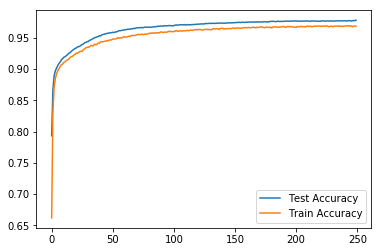

In [349]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_acc, label='Test Accuracy')
ax.plot(train_acc, label='Train Accuracy')
plt.legend()
plt.show()

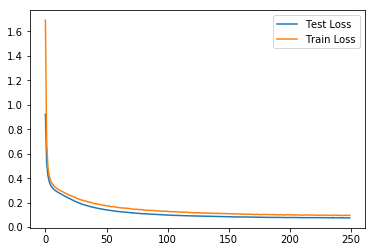

In [350]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_loss, label='Test Loss')
ax.plot(train_loss, label='Train Loss')
plt.legend()
plt.show()

# Without DropOut Regularization

In [377]:
# Update the paramteres
batch_size = 64
n_epochs = 500
learning_rate = 1e-2
train_loss = []
test_loss = []
test_acc = []
train_acc = []
keep_prob = 1.0
number_of_batches = m // batch_size
for epoch in range(n_epochs):
    loss = 0.0
    correct_cnt = 0
    for i in range(0, m - m % batch_size, batch_size):
        X = train_images[i: i + batch_size]
        y = train_labels[i: i + batch_size]
        # Forward propagation
        Z1 = X.dot(W1) + b1
        A1 = np.tanh(Z1)
        # DropOut
        dropout_mask = np.random.uniform(size=A1.shape)
        dropout_mask = dropout_mask <= keep_prob
        A1 = A1 * dropout_mask
        A1 /= keep_prob
        Z2 = A1.dot(W2) + b2
        yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
        # Cross Entropy Loss
        loss += np.mean(-np.log(yhat[range(X.shape[0]), y]))
        correct_cnt += np.sum(np.argmax(yhat, axis=1) == y)
        # Backpropagation
        dZ2 = yhat
        dZ2[range(i % batch_size, (i % batch_size + batch_size)), y] -= 1
        dZ2 = dZ2 / batch_size
        dW2 = A1.T.dot(dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = dZ2.dot(W2.T) * (1 - A1 ** 2)
        dZ1 = dZ1 * dropout_mask
        #dZ1[dZ1 <= 0] = 0
        dW1 = X.T.dot(dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        # Update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    loss_train = loss / number_of_batches
    train_accuracy = correct_cnt / m
    train_acc.append(train_accuracy)
    train_loss.append(loss_train)
    X = test_images
    Z1 = X.dot(W1) + b1
    A1 = np.tanh(Z1)
    Z2 = A1.dot(W2) + b2
    yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
    # Cross Entropy Loss
    loss_test = np.mean(-np.log(yhat[range(X.shape[0]), test_labels]))
    test_loss.append(loss_test)
    test_correct_cnt = np.sum(np.argmax(yhat, axis=1) == test_labels)
    test_accuracy = test_correct_cnt / len(test_labels)
    test_acc.append(test_accuracy)
    print(f'Epoch: {epoch} \t Training Acc: {train_accuracy:.4f} \t Test Acc: {test_accuracy:.4f}')

Epoch: 0 	 Training Acc: 0.6853 	 Test Acc: 0.8244
Epoch: 1 	 Training Acc: 0.8525 	 Test Acc: 0.8799
Epoch: 2 	 Training Acc: 0.8815 	 Test Acc: 0.8936
Epoch: 3 	 Training Acc: 0.8926 	 Test Acc: 0.9005
Epoch: 4 	 Training Acc: 0.8993 	 Test Acc: 0.9059
Epoch: 5 	 Training Acc: 0.9045 	 Test Acc: 0.9105
Epoch: 6 	 Training Acc: 0.9080 	 Test Acc: 0.9140
Epoch: 7 	 Training Acc: 0.9109 	 Test Acc: 0.9175
Epoch: 8 	 Training Acc: 0.9131 	 Test Acc: 0.9184
Epoch: 9 	 Training Acc: 0.9152 	 Test Acc: 0.9198
Epoch: 10 	 Training Acc: 0.9172 	 Test Acc: 0.9216
Epoch: 11 	 Training Acc: 0.9187 	 Test Acc: 0.9229
Epoch: 12 	 Training Acc: 0.9203 	 Test Acc: 0.9255
Epoch: 13 	 Training Acc: 0.9216 	 Test Acc: 0.9265
Epoch: 14 	 Training Acc: 0.9232 	 Test Acc: 0.9275
Epoch: 15 	 Training Acc: 0.9248 	 Test Acc: 0.9284
Epoch: 16 	 Training Acc: 0.9263 	 Test Acc: 0.9294
Epoch: 17 	 Training Acc: 0.9278 	 Test Acc: 0.9304
Epoch: 18 	 Training Acc: 0.9290 	 Test Acc: 0.9317
Epoch: 19 	 Training A

Epoch: 157 	 Training Acc: 0.9883 	 Test Acc: 0.9770
Epoch: 158 	 Training Acc: 0.9885 	 Test Acc: 0.9771
Epoch: 159 	 Training Acc: 0.9886 	 Test Acc: 0.9771
Epoch: 160 	 Training Acc: 0.9887 	 Test Acc: 0.9770
Epoch: 161 	 Training Acc: 0.9888 	 Test Acc: 0.9771
Epoch: 162 	 Training Acc: 0.9888 	 Test Acc: 0.9771
Epoch: 163 	 Training Acc: 0.9889 	 Test Acc: 0.9772
Epoch: 164 	 Training Acc: 0.9891 	 Test Acc: 0.9772
Epoch: 165 	 Training Acc: 0.9892 	 Test Acc: 0.9772
Epoch: 166 	 Training Acc: 0.9892 	 Test Acc: 0.9772
Epoch: 167 	 Training Acc: 0.9894 	 Test Acc: 0.9772
Epoch: 168 	 Training Acc: 0.9895 	 Test Acc: 0.9772
Epoch: 169 	 Training Acc: 0.9896 	 Test Acc: 0.9773
Epoch: 170 	 Training Acc: 0.9897 	 Test Acc: 0.9773
Epoch: 171 	 Training Acc: 0.9898 	 Test Acc: 0.9774
Epoch: 172 	 Training Acc: 0.9899 	 Test Acc: 0.9774
Epoch: 173 	 Training Acc: 0.9899 	 Test Acc: 0.9774
Epoch: 174 	 Training Acc: 0.9901 	 Test Acc: 0.9775
Epoch: 175 	 Training Acc: 0.9902 	 Test Acc: 

Epoch: 312 	 Training Acc: 0.9978 	 Test Acc: 0.9799
Epoch: 313 	 Training Acc: 0.9978 	 Test Acc: 0.9800
Epoch: 314 	 Training Acc: 0.9978 	 Test Acc: 0.9800
Epoch: 315 	 Training Acc: 0.9978 	 Test Acc: 0.9800
Epoch: 316 	 Training Acc: 0.9978 	 Test Acc: 0.9801
Epoch: 317 	 Training Acc: 0.9978 	 Test Acc: 0.9801
Epoch: 318 	 Training Acc: 0.9978 	 Test Acc: 0.9801
Epoch: 319 	 Training Acc: 0.9979 	 Test Acc: 0.9801
Epoch: 320 	 Training Acc: 0.9979 	 Test Acc: 0.9801
Epoch: 321 	 Training Acc: 0.9979 	 Test Acc: 0.9801
Epoch: 322 	 Training Acc: 0.9979 	 Test Acc: 0.9801
Epoch: 323 	 Training Acc: 0.9979 	 Test Acc: 0.9802
Epoch: 324 	 Training Acc: 0.9979 	 Test Acc: 0.9802
Epoch: 325 	 Training Acc: 0.9979 	 Test Acc: 0.9802
Epoch: 326 	 Training Acc: 0.9980 	 Test Acc: 0.9802
Epoch: 327 	 Training Acc: 0.9980 	 Test Acc: 0.9802
Epoch: 328 	 Training Acc: 0.9980 	 Test Acc: 0.9802
Epoch: 329 	 Training Acc: 0.9980 	 Test Acc: 0.9802
Epoch: 330 	 Training Acc: 0.9980 	 Test Acc: 

Epoch: 467 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 468 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 469 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 470 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 471 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 472 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 473 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 474 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 475 	 Training Acc: 0.9991 	 Test Acc: 0.9811
Epoch: 476 	 Training Acc: 0.9991 	 Test Acc: 0.9812
Epoch: 477 	 Training Acc: 0.9991 	 Test Acc: 0.9812
Epoch: 478 	 Training Acc: 0.9992 	 Test Acc: 0.9812
Epoch: 479 	 Training Acc: 0.9992 	 Test Acc: 0.9812
Epoch: 480 	 Training Acc: 0.9992 	 Test Acc: 0.9812
Epoch: 481 	 Training Acc: 0.9992 	 Test Acc: 0.9812
Epoch: 482 	 Training Acc: 0.9992 	 Test Acc: 0.9812
Epoch: 483 	 Training Acc: 0.9992 	 Test Acc: 0.9812
Epoch: 484 	 Training Acc: 0.9992 	 Test Acc: 0.9812
Epoch: 485 	 Training Acc: 0.9992 	 Test Acc: 

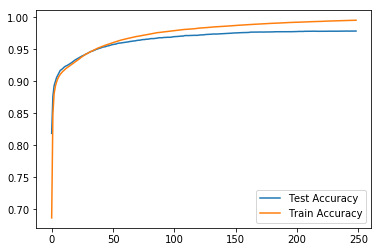

In [300]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_acc, label='Test Accuracy')
ax.plot(train_acc, label='Train Accuracy')
plt.legend()
plt.show()

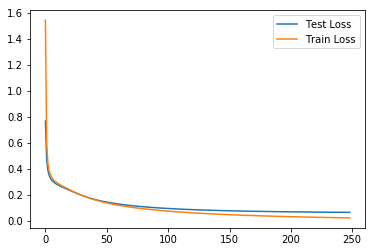

In [301]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_loss, label='Test Loss')
ax.plot(train_loss, label='Train Loss')
plt.legend()
plt.show()

In [302]:
train_acc[-1]

0.9953666666666666

In [303]:
test_acc[-1]

0.9785